In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('housing.csv')

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv("housing.csv")

# Show basic info and first few rows
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0.00632  505 non-null    float64
 1   18.00    505 non-null    float64
 2   2.310    505 non-null    float64
 3   0        505 non-null    int64  
 4   0.5380   505 non-null    float64
 5   6.5750   505 non-null    float64
 6   65.20    505 non-null    float64
 7   4.0900   505 non-null    float64
 8   1        505 non-null    int64  
 9   296.0    505 non-null    float64
 10  15.30    505 non-null    float64
 11  396.90   505 non-null    float64
 12  4.98     505 non-null    float64
 13  24.00    505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB
None
   0.00632  18.00  2.310  0  0.5380  6.5750  65.20  4.0900  1  296.0  15.30  \
0  0.02731    0.0   7.07  0   0.469   6.421   78.9  4.9671  2  242.0   17.8   
1  0.02729    0.0   7.07  0   0.469   7.185   61.1  4.9671  2  242.0   1

In [13]:
columns = [
    "CRIM",     # per capita crime rate by town
    "ZN",       # proportion of residential land zoned for lots over 25,000 sq.ft.
    "INDUS",    # proportion of non-retail business acres per town
    "CHAS",     # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    "NOX",      # nitric oxides concentration (parts per 10 million)
    "RM",       # average number of rooms per dwelling
    "AGE",      # proportion of owner-occupied units built prior to 1940
    "DIS",      # weighted distances to five Boston employment centres
    "RAD",      # index of accessibility to radial highways
    "TAX",      # full-value property-tax rate per $10,000
    "PTRATIO",  # pupil-teacher ratio by town
    "B",        # 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    "LSTAT",    # % lower status of the population
    "MEDV"      # Median value of owner-occupied homes in $1000's (target)
]


In [15]:
# Load data
df = pd.read_csv("housing.csv", header=None)

In [16]:
# Rename columns
df.columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD",
    "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

In [17]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [18]:
# Split features and target
X = df.drop("MEDV", axis=1)
y = df["MEDV"]


In [20]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.preprocessing import StandardScaler
# Feature scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [26]:
# Print evaluation
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 3.19
Mean Squared Error (MSE): 24.29
Root Mean Squared Error (RMSE): 4.93
R-squared (R²): 0.67


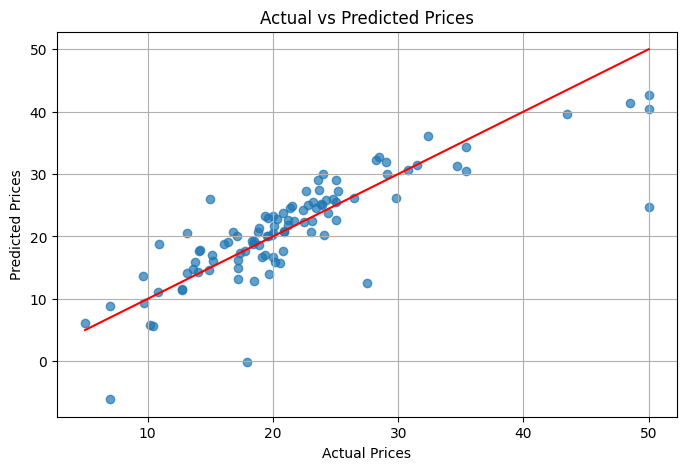

In [27]:
# Plot predicted vs actual
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Diagonal line
plt.grid(True)
plt.show()